In [228]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
import chart_studio.plotly as py
import plotly.graph_objects as go
from plotly.graph_objs import *

In [229]:
df_stocks = pd.read_csv("historical_stock_prices.csv")

In [230]:
df = df_stocks[['ticker','close','date']][0:1000000].copy()

In [231]:
df['date'] = pd.to_datetime(df.date)
df = df[df['date'] > '2010-01-01']
df = df.sort_values(by='date')
df = df.reset_index(drop=True)
df

,ticker,close,date
0,MHN,13.350000,2010-01-04
1,CREE,56.840000,2010-01-04
2,MHI,13.780000,2010-01-04
3,RRD,22.709999,2010-01-04
4,CTRN,26.860001,2010-01-04
...,...,...,...
457496,SPOT,192.380005,2018-08-24
457497,IVAC,5.630000,2018-08-24
457498,PFS,25.629999,2018-08-24
457499,YRIV,11.640000,2018-08-24


In [232]:
uniqueTickers = df.ticker.unique()
uniquedate = df.date.unique()
newDf = pd.DataFrame(index=uniquedate, columns=uniqueTickers)
newDf = newDf.fillna(np.nan) # with 0s rather than NaNs
newDf

,MHN,CREE,MHI,RRD,CTRN,MDRX,AMSWA,YTEN,MHF,VIAV,...,RSG,FLNT,OXSQ,MOGO,PFO,SRTS,CAAP,GNPX,SPOT,APY
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-08-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-08-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-08-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-08-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [233]:
for i in range(0, len(df)):
    date = df.loc[i, 'date']
    close = df.loc[i, 'close']
    ticker = df.loc[i, 'ticker']
    newDf.loc[date,ticker] = close


In [234]:
print(newDf.isna().sum())
newDf = newDf.dropna(axis=1)

MHN        0
CREE       0
MHI        0
RRD        0
CTRN       0
        ... 
SRTS    2025
CAAP    2036
GNPX    2075
SPOT    2075
APY     2100
Length: 278, dtype: int64


In [220]:
len(df_stocks)

20973889

In [235]:
def normalize(df):
    tickers = list(df.columns) 
    
    for i in range(0, len(tickers)):
        colMax = df[tickers[i]].max()
        df[tickers[i]]=df[tickers[i]]/colMax


normalize(newDf)
newDf

Z:\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,MHN,CREE,MHI,RRD,CTRN,MDRX,AMSWA,MHF,VIAV,ARE,...,MIN,AIV,MHK,ANIP,NCMI,DWSN,PFS,CRESY,ODC,CTRP
2010-01-04,0.783451,0.686059,0.822196,0.953801,0.719143,0.897402,0.342419,0.819491,0.300426,0.474148,...,0.944837,0.335365,0.169616,0.406824,0.845541,0.321976,0.370984,0.633776,0.317306,0.303449
2010-01-05,0.789319,0.681835,0.821599,0.951701,0.742436,0.877587,0.340715,0.815061,0.301491,0.469149,...,0.950495,0.343770,0.168949,0.406824,0.864973,0.339253,0.359931,0.662134,0.309557,0.320400
2010-01-06,0.791080,0.710078,0.831146,0.956321,0.772691,0.866579,0.334469,0.822813,0.316761,0.466687,...,0.958982,0.349863,0.168282,0.406824,0.857997,0.345535,0.365458,0.665142,0.307371,0.313620
2010-01-07,0.790493,0.705733,0.831742,0.973961,0.780723,0.866138,0.334469,0.823920,0.318537,0.471014,...,0.954738,0.362681,0.171231,0.419947,0.852018,0.353388,0.372366,0.682759,0.312140,0.306002
2010-01-08,0.794014,0.716596,0.832936,0.962201,0.783133,0.871422,0.337876,0.823920,0.316761,0.469447,...,0.956153,0.354276,0.174286,0.419947,0.856502,0.344750,0.396200,0.670298,0.316312,0.304621
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-08-20,0.721831,0.560410,0.690334,0.218816,0.841767,0.642448,0.940943,0.798450,0.687343,0.958069,...,0.538897,0.924144,0.668879,0.409230,0.444943,0.182636,0.878411,0.633797,0.830121,0.656621
2018-08-21,0.725352,0.552565,0.689737,0.215876,0.855422,0.648613,0.960818,0.797342,0.701077,0.949713,...,0.536068,0.913007,0.679060,0.413459,0.454410,0.185818,0.890846,0.629018,0.826743,0.659300
2018-08-22,0.725939,0.553772,0.692124,0.219656,0.870147,0.657420,0.971607,0.801772,0.707945,0.943968,...,0.536068,0.913637,0.677551,0.417979,0.449427,0.188364,0.892573,0.627281,0.819789,0.652771
2018-08-23,0.724765,0.555462,0.689737,0.215036,0.820616,0.647292,0.971607,0.795127,0.709817,0.943968,...,0.537482,0.913007,0.670213,0.417760,0.449925,0.186136,0.888428,0.626846,0.829128,0.654278


In [236]:
m = newDf.mean(axis=0)
s = newDf.std(ddof=1, axis=0)
 
# normalised time-series as an input for PCA
newDf_pca = (newDf - m)/s
 
cov_mat = np.cov(newDf_pca.values.T)     # covariance matrix   
corr_mat = np.corrcoef(newDf_pca.values.T) #correlation matrix

In [237]:
# https://github.com/sonny-qa/reverse-PCA/blob/master/analysis-3.ipynb
#create an interactive heatmap
tickers = list(newDf.columns)
trace = go.Heatmap(z=corr_mat.tolist(),x=tickers,y=tickers,colorscale='Viridis')
data = Data([trace])
layout=Layout(
        title='Correlation matrix for stocks, sectors and countries',
    )
fig = Figure(data=data, layout=layout)
iplot(fig)

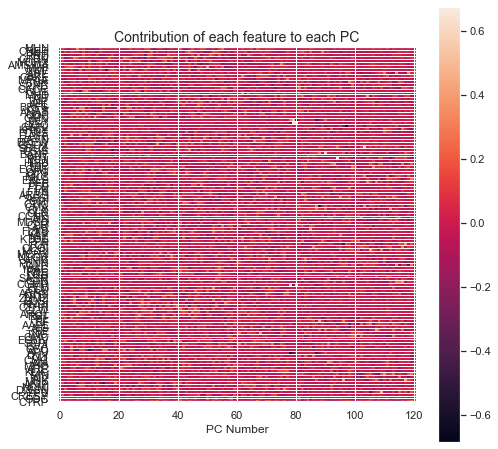

In [240]:
vals, vecs = np.linalg.eig(cov_mat)  
 
ax = plt.figure(figsize=(8,8)).gca()
plt.imshow(vecs, cmap="Viridis")
cb = plt.colorbar()
plt.yticks(np.array(range(0, len(tickers))), tickers)
plt.xlabel("PC Number")
plt.title("Contribution of each feature to each PC", fontsize=14)
plt.show()

Text(0.5, 1.0, 'PCA components total varience')

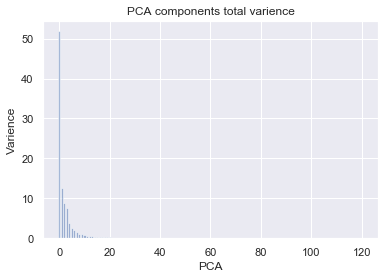

In [227]:
sumOfEigVals = sum(vals)
PCA_varience = (vals/sumOfEigVals)*100
xLables = np.array(range(0, len(vals)))
plt.bar(xLables, PCA_varience, align='center', alpha=0.5)
plt.ylabel('Varience')
plt.xlabel('PCA')
plt.title('PCA components total varience')

array([59.01146041, 14.48706913,  9.85769006,  8.03351649,  4.03358545,
        1.66772821,  0.30355621,  1.15040337,  0.80250384,  0.65248683])